In [ ]:
!pip install --upgrade pip

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium 
from folium import plugins
import matplotlib.pyplot as plt
%matplotlib inline
import os
print(os.listdir("../input"))

['store-locations']


In [2]:
sbucks_world = pd.read_csv('../input/store-locations/directory.csv') #Read in the Store Directory file 
sbucks_world.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
sbucks_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [4]:
import folium 
map_deutschland = folium.Map(location=[51.133481,10.018343], 
                    zoom_start = 5)
map_deutschland

In [5]:
sbucks_de = sbucks_world[(sbucks_world['Country'] == "DE")]
sbucks_de.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
4888,Starbucks,40948-102601,Stern Center Potsdam,Company Owned,NUTHESTRAßE / STERNSTRAßE,POTSDAM,BB,DE,14480,4933160037192,GMT+1:00 Europe/Berlin,13.13,52.37
4889,Starbucks,40947-102602,Brandenburgerstrasse 28a,Company Owned,"BRANDENBURGER STRAß 28A, ALEXA",POTSDAM,BB,DE,14467,493312019631,GMT+1:00 Europe/Berlin,13.06,52.40
4890,Starbucks,40971-108228,Alexa Shopping Centre,Company Owned,GRUNERSTRASSE 20,BERLIN,BE,DE,10719,493027591054,GMT+1:00 Europe/Berlin,13.42,52.52
4891,Starbucks,40949-103780,Potsdamer Platz 5,Company Owned,"POTSDAMER PLATZ 5, Sony-Center",BERLIN,BE,DE,10785,493025358285,GMT+1:00 Europe/Berlin,13.38,52.51
4892,Starbucks,18524-185885,Sony-Center,Company Owned,Neue Potsdamer Str. 2,Berlin,BE,DE,10785,3023003314,GMT+1:00 Europe/Berlin,13.37,52.51


In [6]:
sbucks_de.describe()


,Longitude,Latitude
count,160.000000,160.000000
mean,9.535625,50.867812
std,2.198701,1.655647
min,6.080000,47.990000
25%,7.787500,49.517500
50%,8.785000,50.940000
75%,11.172500,52.415000
max,13.740000,54.320000


In [7]:
import json

# word cloud library
from wordcloud import WordCloud

# seaborn
import seaborn as sns

# matplotlib
import matplotlib
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


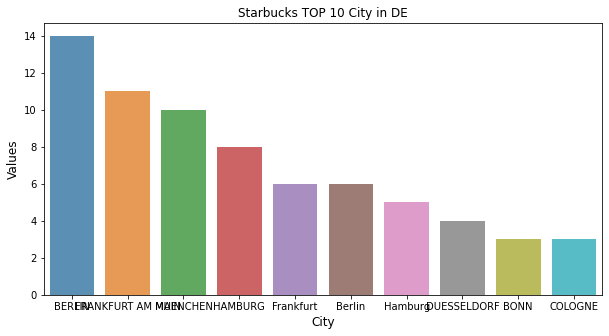

In [8]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed# in the column 'City'
city_count  = sbucks_de['City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Starbucks TOP 10 City in DE')
plt.ylabel('Values', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.show()

**Let's see in which cities the Starbucks stores are denser locally with the folium Maker.**

In [40]:
import folium
#Create a map
map_deutschland = folium.Map(location=[51.133481,10.018343], control_scale=True, zoom_start=6,attr = "text some")

# loop through data to create Marker for each hospital
for i in range(0,len(sbucks_de)):
    
    # html to be displayed in the popup 
    html="""
    <h4> ADRES: </h4>""" + str( sbucks_de.iloc[i]['Street Address'])
    
    #IFrame 
    iframe = folium.IFrame(html=html, width=150, height=250)
    popup = folium.Popup(iframe)
    

    folium.Marker(
    location=[sbucks_de.iloc[i]['Latitude'], sbucks_de.iloc[i]['Longitude']],
    popup=popup,
    tooltip=str(sbucks_de.iloc[i]['City']),
    icon=folium.Icon(color='lightblue',icon='medkit',prefix="fa"),
    ).add_to(map_deutschland)
    
map_deutschland



**With "Wordcloud", we can visualize in which cities the stores density is**

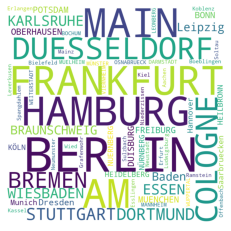

In [15]:

wordcloud = WordCloud(background_color='white',
                    width=1024,
                    height=1024)\
            .generate(" ".join(sbucks_de.City.value_counts().index))

plt.imshow(wordcloud)
plt.axis('off');

**Let's continue our review by visualizing the spread of Starbucks stores in Germany:**
 
**First, let's do this using matplotlib**


In [20]:
#Let's first obtain city indices:

city_indices, city_labels = sbucks_de.City.factorize()
city_labels

Index(['POTSDAM', 'BERLIN', 'Berlin', 'Baden-Baden', 'Boeblingen', 'Esslingen',
       'FREIBURG', 'HEIDELBERG', 'HEILBRONN', 'KARLSRUHE', 'Karlsruhe',
       'LEONBERG', 'Ludwigsburg', 'MANNHEIM', 'STUTTGART', 'Stuttgart',
       'Erlangen', 'Grafenwohr', 'MUENCHEN', 'Munich', 'NUERNBERG', 'NÜRNBERG',
       'BREMEN', 'Bremen', 'DARMSTADT', 'Frankfurt', 'FRANKFURT AM MAIN',
       'Kassel', 'Offenbach am Main', 'Sulzbach', 'VIERNHEIM', 'WEITERSTADT',
       'Wiesbaden', 'WIESBADEN', 'Hamburg', 'HAMBURG', 'Braunschweig',
       'BRAUNSCHWEIG', 'Hannover', 'OSNABRUECK', 'Soltau', 'Aachen',
       'Bielefeld', 'BOCHUM', 'BONN', 'Cologne', 'COLOGNE', 'DORTMUND',
       'Dortmund', 'DUESSELDORF', 'Duesseldorf', 'DUISBURG', 'Essen', 'ESSEN',
       'KÖLN', 'Leverkusen', 'MUELHEIM', 'MÜNSTER', 'OBERHAUSEN', 'WUPPERTAL',
       ' Niederzissen', 'Koblenz', 'Mainz', 'Neustadt Wied', 'Ramstein',
       'Spangdahlem', 'Kiel', 'Neumunster', 'Saarbruecken', 'Dresden',
       'Leipzig', 'LEIPZIG', '

In [33]:
city_indices

array([ 0,  0,  1,  1,  2,  1,  1,  2,  1,  2,  2,  1,  1,  2,  1,  2,  1,
        1,  1,  1,  1,  1,  3,  4,  5,  6,  6,  6,  7,  7,  8,  8,  9,  9,
       10, 11, 12, 13, 14, 14, 15, 15, 14, 16, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 22, 23, 24, 25, 25,
       25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 28,
       29, 30, 31, 32, 33, 33, 34, 35, 35, 35, 34, 34, 35, 35, 34, 34, 35,
       35, 35, 36, 37, 38, 38, 39, 40, 41, 42, 43, 44, 44, 44, 45, 46, 46,
       46, 47, 48, 47, 49, 49, 50, 49, 50, 49, 51, 51, 51, 52, 53, 53, 54,
       54, 55, 56, 57, 58, 58, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       68, 69, 69, 69, 70, 71, 72])

__So, thanks to "city_indices", we can implement our point density map with matplotlib__

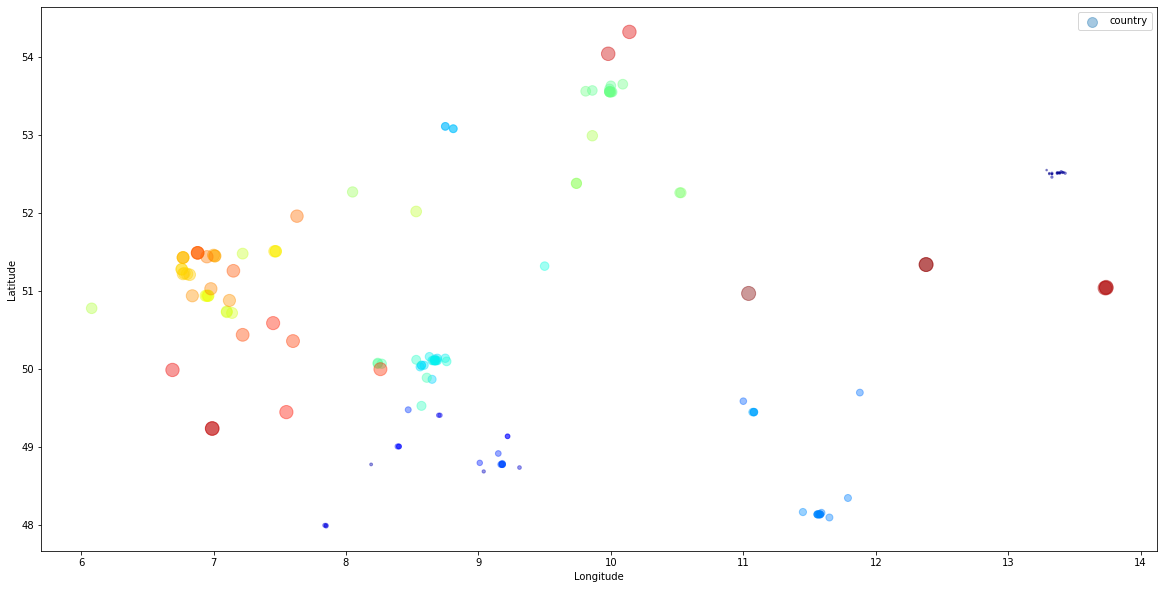

In [39]:
sbucks_de.plot(kind="scatter", x="Longitude", y="Latitude", 
               alpha=0.4, 
               figsize=(20,10), 
               c=sbucks_de.city_indice,
               s=sbucks_de["city_indice"] * 200 / len(city_labels), label="country",
               cmap=plt.get_cmap("jet"), 
               colorbar=False
)
plt.legend();